In [1]:
#Plotting IVT and WA side by side but now with opaqcity factor determined using the mean AR freq across all algorithms.
#Previously figure 6, now Figure 8
import numpy as np
import glob
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import warnings
import dask.array as da
import dask
import matplotlib as mpl
import xarray as xr
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import BoundaryNorm

In [2]:
# Reading the consistency scale value datasets
IVT = np.load("/N/u/dkamnani/BigRed200/Paper plots/IVTcsv16yrs.npy")
WA=np.load("/N/u/dkamnani/BigRed200/Paper plots/WAcsv16yrs.npy")
CB=np.load('CBcsv.npy')
print(WA)
algorithms = np.stack([IVT,WA], axis=0)
print(algorithms.shape)
names = ["(a) IVT", "(b) WA"]

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]]
(2, 361, 576)


In [3]:
# Reading the datasets with consistency scale values for each algorithm and IVT
#Can only be generated after running NCS1.py,NCS2.py
CB = np.load('CBcsv.npy')
CN = np.load('CNcsv.npy')
GW = np.load('GWcsv.npy')
Reid = np.load('RDcsv.npy')
MD = np.load('MDcsv.npy')
IVT = np.load('IVTcsv.npy')
#Mean_AR=xr.open_dataset('Mean_AR.nc').ar_binary_tag 
#AR_freq=Mean_AR.values
#normalized_AR_freq= (AR_freq/50)
#print(normalized_AR_freq.max())
#algorithms = np.stack([GW, MD, Reid, CB, CN, IVT], axis=0)
#print(algorithms.shape)
#names = ["(a) Guan and Waliser", "(b) Mundhenk", "(c) Reid et al.",
 #        "(d) TECA-BARD v1.0.1", "(e) ClimateNet", "(f) IVT"]

In [4]:
#Mean AR Freq

# Load mean AR frequency datasets for each algorithm
file_names = [
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CB.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_CN.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_GW.nc', 
    '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_RD.nc', '/N/u/dkamnani/BigRed200/Paper Final/New additions/Mean_AR_MD.nc'
]

mean_ar_frequencies = []

for file in file_names:
    dataset = xr.open_dataset(file)
    ar_freq=dataset.ar_binary_tag.values
    mean_ar_frequencies.append(ar_freq / ar_freq.max() )  # Normalizing

# Convert list to a NumPy array (shape: 6, height, width)
mean_ar_frequencies = np.stack(mean_ar_frequencies, axis=0)
print(mean_ar_frequencies[3].min())
# Now calculate the mean across algorithm
normalized_AR_freq = np.mean(mean_ar_frequencies, axis=0)  

0.0


0
1


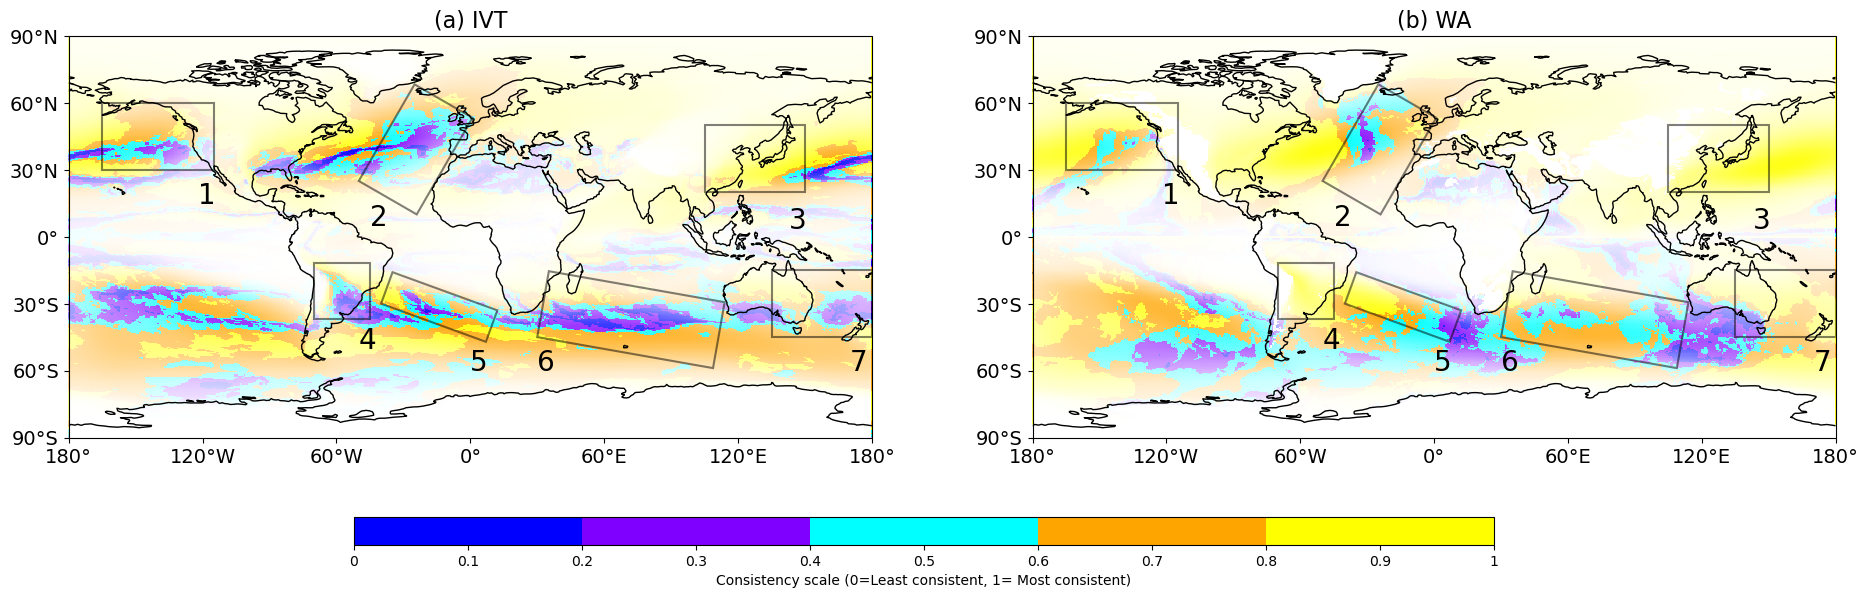

In [5]:
from matplotlib.colors import BoundaryNorm, ListedColormap
lat=np.load('lat.npy')
lon=np.load('lon.npy')
fig, axs = plt.subplots(nrows=1,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(19,7),constrained_layout=False)

# Define the five color-blind friendly colors with RGBA values (R, G, B, A)
colors = [
    (0, 0, 1, 1),    # Blue
    (0.5, 0, 1, 1),   # Purple
    (0, 1, 1, 1),      # Cyan
    (1, 0.647, 0, 1),  # Orange
    (1, 1, 0, 1)    # Yellow
]
# Create a ListedColormap from these colors
cmap = ListedColormap(colors)

# axs is a 2 dimensional array of `GeoAxes`.  We will flatten it into a 1-D array
axs=axs.flatten()
for i in range(0,2):

        data=algorithms[i]
        print(i)
        
        # Contour plot ignoring nan values   
        cs=axs[i].pcolormesh(lon,lat,data,
                          transform = ccrs.PlateCarree(),
                          cmap = cmap,
                          shading='auto')
        
         # Apply 2D alpha transparency
        cs.set_alpha(normalized_AR_freq)
        
        # Title each subplot with the name of the model
        axs[i].set_title(names[i],fontsize=16)

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
        # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        axs[i].tick_params(axis='x', labelsize=14) 

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        axs[i].tick_params(axis='y', labelsize=14) 
        
                 #Adding patches
        axs[i].add_patch(mpatches.Rectangle(xy=[-165, 30], width=50, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    #label='1',
                                    transform=ccrs.PlateCarree())
                 )
                 #-100,45
        axs[i].annotate("1",(-122,15),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-50, 25], width=30, height=50,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='Black',
                                    angle=-30,
                                    transform=ccrs.PlateCarree())
                 )
                 #-25,55
        axs[i].annotate("2",(-45,5),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[105, 20], width=45, height=30,  # Shifted right, slightly reduced width
                                alpha=0.5,
                                lw=1.5,  
                                facecolor='None',
                                edgecolor='black',  
                                angle=0,  
                                transform=ccrs.PlateCarree())
                )
        axs[i].annotate("3",(143,3.5),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-70, -37], width=25, height=25,
        #xy=[-85, -63], width=30, height=50
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #-80,-61
        axs[i].annotate("4",(-50,-50),color='black',fontsize=20)
        #-96,-61     
        axs[i].add_patch(mpatches.Rectangle(xy=[30, -45], width=80, height=30,
                                    alpha=0.5,
                                    lw=1.5,
                                    facecolor='None',
                                    edgecolor='black',
                                    angle=-10,
                                    transform=ccrs.PlateCarree())
                 )
                 #35,-40
        axs[i].annotate("6",(30,-60),color='black',fontsize=20)
        
        axs[i].add_patch(mpatches.Rectangle(xy=[-40, -30], width=50, height=15,
        #xy=[140, -45], width=30, height=30
                                    alpha=0.5,
                                    lw=1.5,
                                    angle=-20,
                                    facecolor='None',
                                    edgecolor='black',
                                    transform=ccrs.PlateCarree())
                 )
                 #157,-42
        axs[i].annotate("5",(0,-60),color='black',fontsize=20)

        axs[i].add_patch(mpatches.Rectangle(xy=[135, -45], width=45, height=30,
                                alpha=0.5,
                                lw=1.5,  # Reduce thickness to 1
                                angle=0,  # Remove rotation
                                facecolor='None',
                                edgecolor='black',  # Change edge color to black
                                transform=ccrs.PlateCarree())
             )

        axs[i].annotate("7", (170, -60), color='black', fontsize=20)

#fig.delaxes(axs[5])

fig.subplots_adjust(bottom=0.0, top=1.2, left=0.05, right=0.98,
                    wspace=None, hspace=0.1)

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.2, 0.15, 0.6, 0.02])
cbar_ax = fig.add_axes([0.2, 0.16, 0.6, 0.04])

# Draw the colorbar
bounds=[0,0.2,0.4,0.6,0.8,1]
norms = BoundaryNorm(bounds, len(bounds) - 1)
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',boundaries = bounds,norm=norms) 
cbar.set_label('Consistency scale (0=Least consistent, 1= Most consistent)')
cbar_ticks = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)', 'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
#cbar_ticks = [0, 0.2, 0.4, 0.6, 0.8]
#cbar_tick_labels = ['Highly inconsistent(0-0.2)', 'Inconsistent(0.2-0.4)',
#                    'Moderately Consistent(0.4-0.6)', 'Consistent(0.6-0.8)', 'Highly Consistent(0.8-1)']
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)
#plt.tight_layout()
plt.savefig("Figure6.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()
